<a href="https://colab.research.google.com/github/nickwan/colab_nflfastR/blob/master/nflfastR_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nflfastR Google Colab starter notebook  
The purpose of this notebook is to get data from the `nflfastR-data` GitHub repo into a Google Colab environment. This is not a perfect 1:1 replacement for the `nflfastR` R library, but it is the basis of the library -- the data that supports all the play-by-play statistics.  

In this notebook, you'll be able to:  
* Import data from the `nflfastR` GitHub repo into your Google Drive  
* Load that data into Google Colab via `pandas`  
* Produce very simple data aggregation  
* Produce very simple data visualization  

## BEFORE ANYTHING: MOUNT DRIVE!   
On the left, there is a folder icon. Click that.  

There should be a little Google Drive icon that says "Mount Drive". Click that.  

Dialog should pop up saying your Google Drive is being mounted. This is a non-skippable step! Make sure your Google Drive is mounted if you encounter subsequent errors because that is a difficult one to Google if you encounter that error (which will actually be defined as "user error" in the end 😭

## Install packages  
Google Colab already comes with a lot of data science packages, like `sklearn`, `pandas`, `scipy`, and `numpy`. However, if you ever need to install a package, you can use the `!` to execute Terminal/bash commands -- like `pip` or `apt get`.  

In order to import data from a GitHub repo into your Google Drive, you'll need to first download `subversion`. 

In [1]:
# if you want a less-verbose installation of a package, you can type:
# !apt install subversion --quiet  

!apt install subversion 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


## Load python libraries 
We'll use five different libraries in this notebook: `os`, `numpy`, `pandas`, `matplotlib`, and `seaborn`.  

`os` allows us to interact with the "local" directories on the operating system (e.g. being able to find the path to the `nflfastR-data` in your Google Drive)  

`numpy` handles data in an array -- like a CSV  

`pandas` is a wrapper around numpy that is more convenient to use -- similar to `data.frame` in `R`  

`matplotlib` is a basic package for data visualization  

`seaborn` is a wrapper around `matplotlib` that makes statistical data visualization more simple -- similar to `ggplot2` in `R`  

If you're unfamiliar with `python` imports, I strongly recommend taking some basic courses in `python` before you continue with this notebook!  

In [2]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Download `nflfastR-data` from GitHub  
This will download straight into your Google Drive into the main directory into a new folder named `nflfastR-data`.  

In [3]:
# You can use this basic code to also get `roster-data` from the repo, as well as `schedules` or `legacy-data`  
# Note: I'm using the `--force` flag and the `--quiet` flag. You'll need to use the `--force` if you want to overwrite data (e.g. when new data is updated in the GitHub repo)
!svn export https://github.com/guga31bb/nflfastR-data/trunk/data "/content/drive/My Drive/nflfastR-data/data" --force --quiet

## Import the data from Google Drive into the Google Colab environment  
We will now import the newly-downloaded data into this environment via `pandas` -- which is very similar to `data.frame` in `R`. 

In [4]:
# Note the fairly verbose path/to/file for Google Drive. 
nflfastr_dir = '/content/drive/My Drive/nflfastR-data'

# `parquet` files are universal between `R` and `python`
# you can choose to use the gzipped csv, just remember to set the `compression` param in `pandas.read_csv()` to 'gzip'  
data_type = '.parquet'

# this is a list comp (similar to a for-loop) that gets a single file type to load into a gigantic dataframe 
# there are multiple ways to load in data, this is just one and perhaps the "simplest" way to get all season to work with in one variable name  
# also note the use of f-strings -- this is basically `paste0()` in R (or `glue::glue()`)
files_to_load = [f"{nflfastr_dir}/data/{x}" for x in os.listdir(f"{nflfastr_dir}/data") if x.endswith(data_type)]

# this loads the data into a `pandas` dataframe and appends each file to the dataframe  
df = pd.DataFrame()
for fn in files_to_load:
  _df = pd.read_parquet(fn) 
  df = df.append(_df,ignore_index=True)

# this is for verification that we loaded in a bunch of data. This is the rows X columns of the dataframe
print(df.shape)

(996549, 322)


if you see something like `(996549, 322)` then congrats! You have loaded in all of the nflfastR-data play-by-play data! 🔥 

Let's inspect the data to make sure the data is legit...  

In [5]:
# This should get us the 2019 Super Bowl, SF vs KC  
(df
 .loc[(df['season']==2019) & 
      (df['week']==21)]
 .head(5))

,play_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,...,drive_yards_penalized,drive_start_transition,drive_end_transition,drive_game_clock_start,drive_game_clock_end,drive_start_yard_line,drive_end_yard_line,drive_play_id_started,drive_play_id_ended,away_score,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,rusher,receiver,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,id,qb_epa
996375,1.0,2019_21_SF_KC,KC,SF,POST,21,None,None,None,None,NaN,2020-02-02,900.0,1800.0,3600.0,Half1,0.0,NaN,0.0,1.0,NaN,0.0,15:00,None,0.0,NaN,GAME,None,NaN,0.0,0.0,NaN,0.0,0.0,0.0,None,None,NaN,NaN,None,...,NaN,None,None,None,None,None,None,NaN,NaN,20.0,31.0,Neutral,11.0,51.0,1.5,52.5,0.0,outdoors,grass,NaN,NaN,Andy Reid,Kyle Shanahan,MIA00,Hard Rock Stadium,NaN,None,None,None,0.0,0.0,NaN,0.0,0.0,None,None,None,None,None,NaN
996376,36.0,2019_21_SF_KC,KC,SF,POST,21,KC,home,SF,SF,35.0,2020-02-02,900.0,1800.0,3600.0,Half1,0.0,1.0,0.0,1.0,NaN,0.0,15:00,SF 35,0.0,7.0,6-M.Wishnowsky kicks 68 yards from SF 35 to KC...,kickoff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN,None,...,0.0,KICKOFF,PUNT,15:00,13:55,KC 26,KC 33,36.0,123.0,20.0,31.0,Neutral,11.0,51.0,1.5,52.5,0.0,outdoors,grass,NaN,NaN,Andy Reid,Kyle Shanahan,MIA00,Hard Rock Stadium,1.0,None,None,None,0.0,0.0,0.0,1.0,0.0,None,None,None,None,None,0.008570
996377,58.0,2019_21_SF_KC,KC,SF,POST,21,KC,home,SF,KC,74.0,2020-02-02,894.0,1794.0,3594.0,Half1,0.0,1.0,0.0,1.0,1.0,0.0,14:54,KC 26,10.0,7.0,(14:54) (Shotgun) 26-Dam.Williams right end to...,run,7.0,1.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN,right,...,0.0,KICKOFF,PUNT,15:00,13:55,KC 26,KC 33,36.0,123.0,20.0,31.0,Neutral,11.0,51.0,1.5,52.5,0.0,outdoors,grass,NaN,NaN,Andy Reid,Kyle Shanahan,MIA00,Hard Rock Stadium,1.0,None,Dam.Williams,None,0.0,1.0,0.0,0.0,1.0,None,32013030-2d30-3033-3038-3734bb46867c,None,Dam.Williams,32013030-2d30-3033-3038-3734bb46867c,0.262895
996378,79.0,2019_21_SF_KC,KC,SF,POST,21,KC,home,SF,KC,67.0,2020-02-02,852.0,1752.0,3552.0,Half1,0.0,1.0,0.0,1.0,2.0,0.0,14:12,KC 33,3.0,7.0,(14:12) (Shotgun) 15-P.Mahomes pass incomplete...,pass,0.0,1.0,0.0,1.0,0.0,0.0,0.0,short,left,-7.0,NaN,None,...,0.0,KICKOFF,PUNT,15:00,13:55,KC 26,KC 33,36.0,123.0,20.0,31.0,Neutral,11.0,51.0,1.5,52.5,0.0,outdoors,grass,NaN,NaN,Andy Reid,Kyle Shanahan,MIA00,Hard Rock Stadium,0.0,P.Mahomes,None,Dam.Williams,1.0,0.0,0.0,0.0,1.0,32013030-2d30-3033-3338-3733fa30c4fa,None,32013030-2d30-3033-3038-3734bb46867c,P.Mahomes,32013030-2d30-3033-3338-3733fa30c4fa,-0.846079
996379,101.0,2019_21_SF_KC,KC,SF,POST,21,KC,home,SF,KC,67.0,2020-02-02,848.0,1748.0,3548.0,Half1,0.0,1.0,0.0,1.0,3.0,0.0,14:08,KC 33,3.0,7.0,(14:08) (Shotgun) 15-P.Mahomes pass incomplete...,pass,0.0,1.0,0.0,1.0,0.0,0.0,0.0,short,right,-2.0,NaN,None,...,0.0,KICKOFF,PUNT,15:00,13:55,KC 26,KC 33,36.0,123.0,20.0,31.0,Neutral,11.0,51.0,1.5,52.5,0.0,outdoors,grass,NaN,NaN,Andy Reid,Kyle Shanahan,MIA00,Hard Rock Stadium,0.0,P.Mahomes,None,Dam.Williams,1.0,0.0,0.0,0.0,1.0,32013030-2d30-3033-3338-3733fa30c4fa,None,32013030-2d30-3033-3038-3734bb46867c,P.Mahomes,32013030-2d30-3033-3338-3733fa30c4fa,-1.436450


In [6]:
# this should aggregate the top 10 rushers by cumulative EPA in 2012  (AP #1) 
(df
 .loc[(df['season']==2012) & 
      (df['rush']==1), 
      ['rusher_id', 'rusher', 'epa']]
 .groupby(['rusher_id', 'rusher'] 
          ,as_index=False)
 .sum()
 .sort_values('epa', 
              ascending=False)
 .head(10))

,rusher_id,rusher,epa
62,32013030-2d30-3032-3533-3934ceb6c025,A.Peterson,23.687491
196,32013030-2d30-3032-3739-33399bbb0097,C.Newton,20.824217
151,32013030-2d30-3032-3730-3934551d8d0c,A.Brown,17.760634
205,32013030-2d30-3032-3739-373477e16970,C.Kaepernick,17.316782
188,32013030-2d30-3032-3738-3631206be155,C.Spiller,17.310986
300,32013030-2d30-3032-3936-3635a9a33dbc,R.Griffin III,15.229058
270,32013030-2d30-3032-3932-363323eefb5c,R.Wilson,13.548181
135,32013030-2d30-3032-3639-3332f0357818,C.Peerman,13.263201
223,32013030-2d30-3032-3830-3533d9e0b0af,K.Hunter,9.526594
213,32013030-2d30-3032-3830-303218eca9b5,R.Cobb,8.887830


# Congrats! You have loaded in `nflfastR-data` successfully!!  
Let's play with the data a little  

What was Frank Gore's best year?  

In [7]:
# Get Gore's player ID  
fg_ids = df.loc[df['rusher']=='F.Gore','rusher_id'].unique()

# Filter for only plays Frank Gore was in  

(df
 .loc[(df['rusher_id'].isin(fg_ids)) | 
      (df['receiver_id'].isin(fg_ids)) | 
      (df['passer_id'].isin(fg_ids)), 
      ['season','epa']]
 .groupby('season', 
          as_index=False)
 .sum()
 .sort_values('epa',
              ascending=False))

,season,epa
7,2012,8.336967
13,2018,2.842603
4,2009,0.566461
11,2016,-12.117265
0,2005,-12.921553
12,2017,-18.149553
3,2008,-20.483700
5,2010,-21.052310
1,2006,-23.792506
9,2014,-26.463183


2012 was Frank Gore's best year using `EPA` as the metric of success -- interesting that 2011 was so bad! What a rebound, future-HOF Franky G.  

How do Aaron Rodgers and Russell Wilson compare over the seasons?  

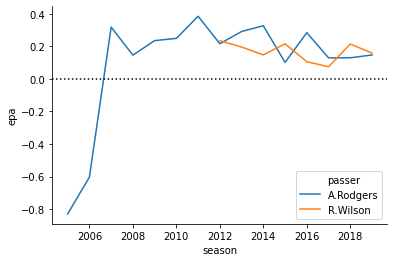

In [8]:
# Get Wilson and Rodgers player IDs  
qb_ids = df.loc[df['passer'].isin(['A.Rodgers', 'R.Wilson']),'passer_id'].unique()

# aggregate the EPA over seasons  
df_plt = (df
          .loc[(df['passer_id']
                .isin(qb_ids)) | 
               (df['rusher_id']
                .isin(qb_ids)), 
               ['season','passer','epa']]
          .groupby(['season', 'passer'], 
                   as_index=False)
          .mean())

sns.lineplot(x='season', y='epa', data=df_plt, hue='passer') 
plt.axhline(0,c='k',ls=':')
sns.despine()
plt.show()

## Final Thoughts  
This should get you started with `nflfastR-data` in Google Colab! There are basic `pandas` functions and some very simple data visualization via `seaborn`. There is much more to explore, so feel free to copy/clone this notebook and explore the data for yourself!  

@nickwan 2020-06-19  
